# THE SPARKS FOUNDATION  @GRIPNOVEMBER2021


## TASK 2 - Prediction Using Unsupervised ML

### PROBLEM STATEMENT - From the given 'iris' dataset, predict the optimum number of clusters and represent it visually.

### Author - Sparsh Lakhani

### Algorithm used - 'k-means clustering'

In [20]:
#importing all the necessary libraries
import numpy as np                                
import matplotlib.pyplot as plt                   
import pandas as pd
from sklearn import datasets 



### 1) Loading the iris dataset

In [21]:
df = pd.read_csv("iris.csv", index_col = 0)
df.head()# See the first 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2) Finding the optimum number of clusters for k-means classification

In [31]:
x = df.iloc[:, :4].values
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

pd.DataFrame({"Number of Clusters":range(1,11),"WCSS":wcss})

,Number of Clusters,WCSS
0,1,680.824400
1,2,152.368706
2,3,78.940841
3,4,57.317873
4,5,46.561630
5,6,38.930963
6,7,34.190688
7,8,30.063874
8,9,27.842356
9,10,26.048202


### 3) Plotting the results onto a line graph

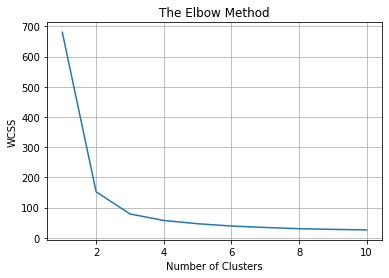

In [27]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [29]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### 4) Visualising the clusters - On the first two columns

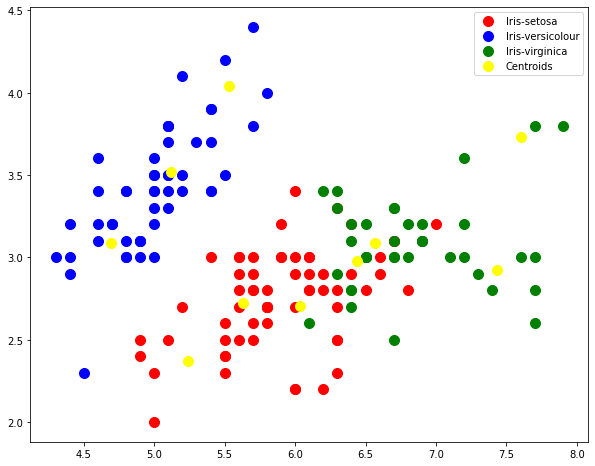

In [32]:
plt.figure(figsize=[10,8])
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], 
            s = 100, c = "red", label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()